<a href="https://colab.research.google.com/github/mburkey3/Intro_to_ML/blob/main/Assignment%202/MB_Assignmet2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/Intro_to_ML/Datasets/Housing.csv'

housing = pd.DataFrame(pd.read_csv(file_path))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
## PRE-PROCESSING

# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [ ]:
# Map Y/N variables to binary

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
## Problem 1a)
varlist_1a = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
housing_1a = housing[varlist_1a]
housing_1a.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


In [ ]:
# Split the data into 2 sets
from sklearn.model_selection import train_test_split

# Set seed to ensure consistancy
np.random.seed(777)
ds_train, ds_valid = train_test_split(housing_1a, train_size = 0.8, test_size = 0.2, random_state = 100)

# No normalization required for problem 1
## END OF PRE-PROCESSING

In [ ]:
# Seperate price (y) from the input (x)
y_train1a = ds_train.pop('price')
x_train1a = ds_train
# Validation set
y_val1a = ds_valid.pop('price')
x_val1a = ds_valid

In [ ]:
# Training using gradient descent
# initial values
learning_rate = 0.000000001 # very small due to no pre-processing
iterations = 500
theta = np.zeros(6)
theta

array([0., 0., 0., 0., 0., 0.])

In [ ]:
x_train1a = np.c_[np.ones((len(x_train1a), 1)), x_train1a] # This adds a column of 1's
# Add x0 to validation set
x_val1a = np.c_[np.ones((len(x_val1a), 1)), x_val1a] # This adds a column of 1's
## THIS MUST ONLY RUN ONCE ##
x_train1a

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 0.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 2.00e+00],
       ...,
       [1.00e+00, 3.42e+03, 2.00e+00, 1.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 6.00e+03, 3.00e+00, 2.00e+00, 3.00e+00, 0.00e+00],
       [1.00e+00, 7.70e+03, 2.00e+00, 1.00e+00, 1.00e+00, 0.00e+00]])

In [ ]:
# Loss calculation function
def Loss_calculator(x_1, x_2, y_1, y_2, theta, iterations, alpha) :
    train_losses = []
    val_losses = []
    m = len(x_1)

    for i in range(iterations) :
        gradients = 2/m * x_1.T.dot(x_1.dot(theta) - y_1)
        theta -= alpha * gradients

        train_loss = (1/m) * np.sum(np.square(x_1.dot(theta) - y_1))
        val_loss = (1/len(x_2)) * np.sum(np.square(x_2.dot(theta) - y_2))

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses

In [ ]:
# Calculate losses for training and validation sets
train_losses, val_losses = Loss_calculator(x_train1a, x_val1a, y_train1a, y_val1a, theta, iterations, learning_rate)

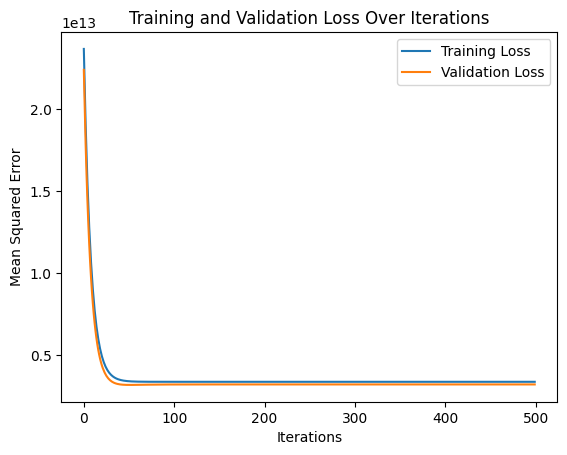

In [ ]:
# Plot training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

In [ ]:
## Problem 1b
# Area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea
varlist_1b = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
housing_1b = housing[varlist_1b]
housing_1b.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,13300000,7420,4,2,3,1,0,0,0,1,2,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [ ]:
# Split the data into 2 sets
ds_train, ds_valid = train_test_split(housing_1b, train_size = 0.8, test_size = 0.2, random_state = 100)

# Seperate price (y) from the input (x)
y_train1b = ds_train.pop('price')
x_train1b = ds_train
# Validation set
y_val1b = ds_valid.pop('price')
x_val1b = ds_valid
x_val1b.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


In [ ]:
# Training using gradient descent
# initial values
learning_rate = 0.000000001 # very small due to no pre-processing
iterations = 500
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
x_train1b = np.c_[np.ones((len(x_train1b), 1)), x_train1b] # This adds a column of 1's
# Add x0 to validation set
x_val1b = np.c_[np.ones((len(x_val1b), 1)), x_val1b] # This adds a column of 1's
## THIS MUST ONLY RUN ONCE ##
x_train1b

array([[1.00e+00, 8.05e+03, 3.00e+00, ..., 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, ..., 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, ..., 0.00e+00, 2.00e+00, 1.00e+00],
       ...,
       [1.00e+00, 3.42e+03, 2.00e+00, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.00e+03, 3.00e+00, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [1.00e+00, 7.70e+03, 2.00e+00, ..., 0.00e+00, 0.00e+00, 0.00e+00]])

In [ ]:
# Calculate losses for training and validation sets
train_losses, val_losses = Loss_calculator(x_train1b, x_val1b, y_train1b, y_val1b, theta, iterations, learning_rate)

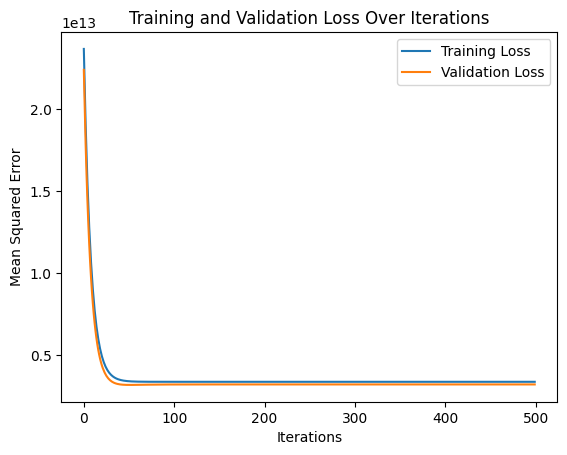

In [ ]:
# Plot training and validation loss
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()